<a href="https://colab.research.google.com/github/agustinaswd/Rakamin_DS26_MiniProject3/blob/main/Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
! pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 60.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rakamin/marketing_campaign_data - marketing_campaign_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
531,531,2004,1969,S1,Lajang,72679000.0,0,1,18-09-2013,65,...,1,0,0,0,0,0,0,3,11,0
651,651,6728,1985,S1,Bertunangan,29103000.0,1,0,27-08-2012,38,...,9,0,0,0,0,0,0,3,11,0
2092,2092,3107,1976,S1,Bertunangan,71322000.0,0,1,02-05-2014,31,...,2,0,0,0,0,0,0,3,11,0


#Task 1

## Feature Engineering

###Age

#### Adjust Data Type

In [ ]:
#change Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
from datetime import date as dt

In [ ]:
now = dt.today()

In [ ]:
current_year = now.year
current_year

2023

In [ ]:
df['Age'] = current_year - df['Year_Birth']

In [ ]:
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1930,1930,5734,1974,S3,Menikah,61917000.0,1,1,2013-11-20,83,...,0,0,0,0,0,0,3,11,0,49
369,369,2928,1975,S3,Lajang,52614000.0,0,1,2012-01-12,63,...,0,0,0,0,0,0,3,11,0,48
2178,2178,4377,1971,S1,Menikah,52914000.0,0,1,2013-07-01,32,...,1,0,0,0,0,0,3,11,0,52


### Age Group
Child : < 12 years<br />
Teens : 12 - 17 yearsn<br />
Young Adults : 18 - 35 years<br />
Middle Adults : 36 - 55 years<br />
Senior Adults : > 55 years<br />

In [ ]:
def segment_age(x) :
  if x['Age'] < 12 :
    AgeGroup = 'Child'
  elif x['Age'] in range(12,18,1) :
    AgeGroup = 'Teens'
  elif x['Age'] in range(18,36,1) :
    AgeGroup = 'Young Adults'
  elif x['Age'] in range(36,56,1) :
    AgeGroup = 'Middle Adults'
  elif x['Age'] > 55 :
    AgeGroup = 'Senior Adults'
  return AgeGroup

In [ ]:
df['AgeGroup'] = df.apply(lambda x: segment_age(x), axis=1)

### Total Kids

In [ ]:
df['TotalKids'] = df['Kidhome'] + df['Teenhome']

###Marital Status

In [ ]:
df['MaritalStatus'] = np.where(df['Marital_Status'].isin(['Menikah','Bertunangan']),
                               'InCouple', 'Alone')

###Is Parents

In [ ]:
df['IsParents'] = np.where(df['TotalKids'] > 0, 1, 0)

###Total Spending

In [ ]:
df['TotalSpending'] = df['MntCoke'] + df['MntFruits'] +  df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

###Total Accepted Campaign

In [ ]:
df['TotalAccCmpg'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

###Total Transaction

In [ ]:
#total respon = total transaction
df['TotalTransaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumWebPurchases']

###Conversion Rate

Conversion rate analysis is a search for insight into the percentage of website visitors and what actions they take while visiting the site, and whether their actions result in a purchase transaction or not while visiting the website.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [ ]:
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y

In [ ]:
df['ConversionRate'] = df.apply(lambda x : safe_div(x['TotalTransaction'], x['NumWebVisitsMonth']), axis = 1)

In [ ]:
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,Age,AgeGroup,TotalKids,MaritalStatus,IsParents,TotalSpending,TotalAccCmpg,TotalTransaction,ConversionRate
1649,1649,7485,1950,S3,Janda,56551000.0,1,1,2014-07-05,48,...,0,73,Senior Adults,2,Alone,1,138000,0,8,2.000000
1875,1875,9612,1987,D3,Lajang,23830000.0,0,0,2014-07-02,3,...,0,36,Middle Adults,0,Alone,0,43000,0,3,0.428571
1588,1588,5892,1980,S1,Menikah,34968000.0,1,0,2013-10-04,11,...,0,43,Middle Adults,1,InCouple,1,221000,0,15,2.142857


##EDA

###Descriptive Statistics

In [ ]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Age,TotalKids,IsParents,TotalSpending,TotalAccCmpg,TotalTransaction,ConversionRate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,3.0,11.0,0.149107,54.194196,0.950446,0.715179,6.057982e+05,0.297768,13.156696,3.685352
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.0,0.356274,11.984069,0.751803,0.451430,6.022493e+05,0.678381,7.771008,4.117733
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.0,11.0,0.000000,27.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.0,11.0,0.000000,46.000000,0.000000,0.000000,6.875000e+04,0.000000,6.000000,1.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,3.0,11.0,0.000000,53.000000,1.000000,1.000000,3.960000e+05,0.000000,13.000000,2.414286
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,3.0,11.0,0.000000,64.000000,1.000000,1.000000,1.045500e+06,0.000000,18.000000,4.808333
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,3.0,11.0,1.000000,130.000000,3.000000,1.000000,2.525000e+06,4.000000,54.000000,54.000000


In [ ]:
nums = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
        'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue','Age', 'TotalKids',
        'TotalSpending','TotalAccCmpg', 'TotalTransaction','ConversionRate'
        ]

cats = ['Education',
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
        'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
        'Response', 'AgeGroup', 'IsParents'
        ]
     

In [ ]:
df[nums].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,TotalKids,TotalSpending,TotalAccCmpg,TotalTransaction,ConversionRate
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,...,5.790179,5.316518,3.0,11.0,54.194196,0.950446,6.057982e+05,0.297768,13.156696,3.685352
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,...,3.250958,2.426645,0.0,0.0,11.984069,0.751803,6.022493e+05,0.678381,7.771008,4.117733
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,27.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,3.000000,3.000000,3.0,11.0,46.000000,0.000000,6.875000e+04,0.000000,6.000000,1.000000
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,...,5.000000,6.000000,3.0,11.0,53.000000,1.000000,3.960000e+05,0.000000,13.000000,2.414286
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,...,8.000000,7.000000,3.0,11.0,64.000000,1.000000,1.045500e+06,0.000000,18.000000,4.808333
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,13.000000,20.000000,3.0,11.0,130.000000,3.000000,2.525000e+06,4.000000,54.000000,54.000000


In [ ]:
df[cats].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,IsParents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Multivariate Analysis

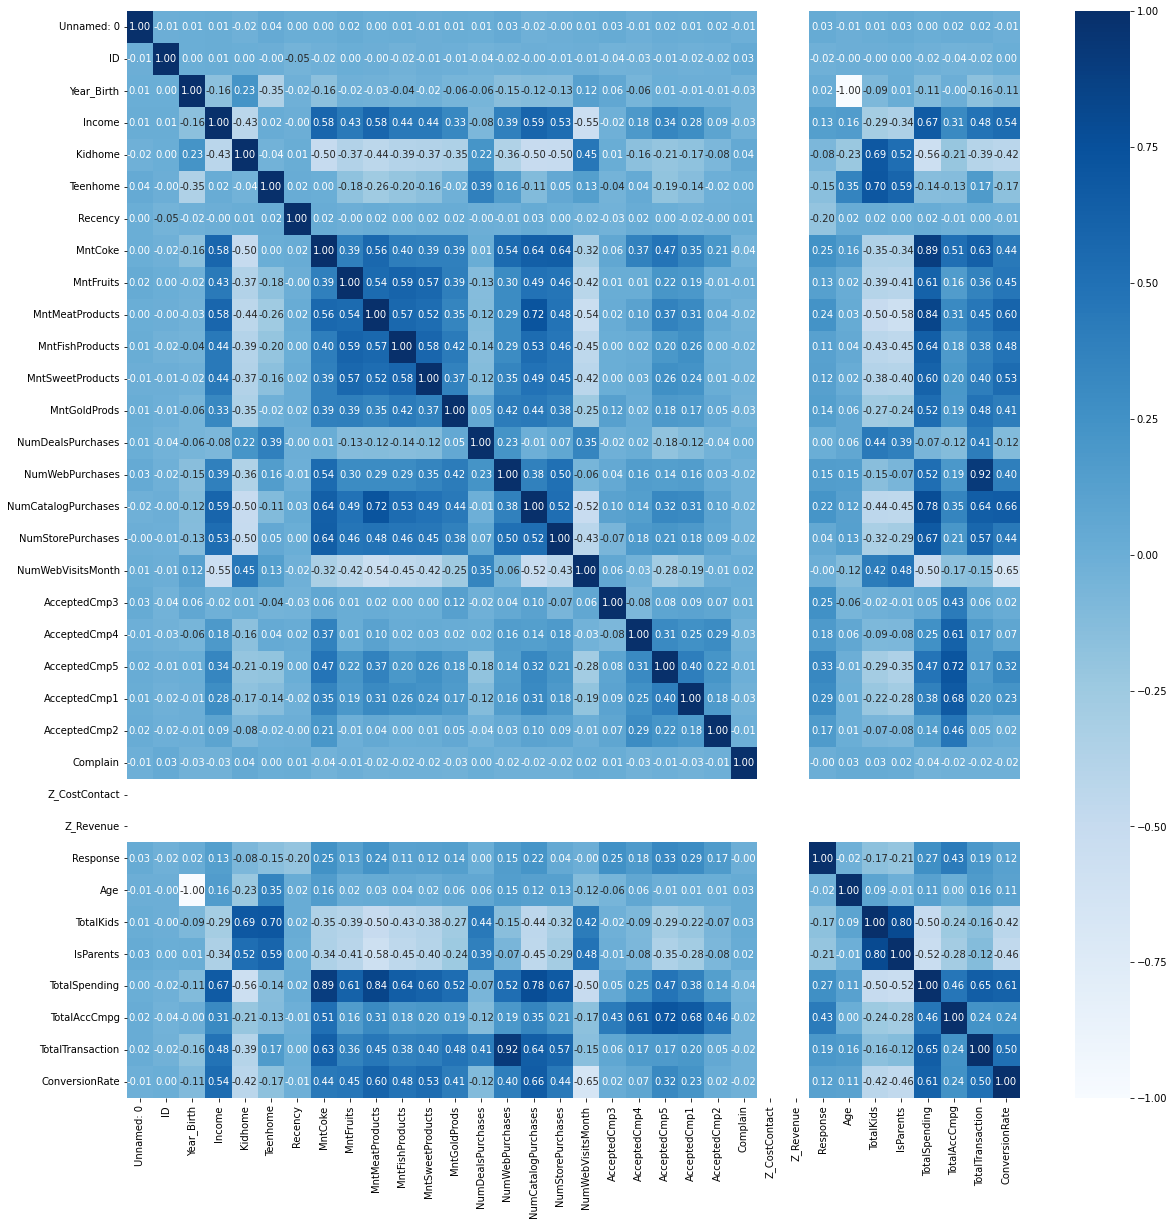

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- TotalKids has a high correlation with Teenhome & IsParents<br />
- NumCatalogPurchases has a high correlation with MntMeatProducts<br />
- TotalSpending has a high correlation with MntCoke, MntMeatProducts, NumCatalogPurchases<br />
- NumWeb Purchases has a high correlation with TotalTransaction<br />
- AcceptedCmp5 has a high correlation with TotalAccCmpg

###Income vs Total Spending

(0.0, 120000000.0)

<Figure size 1080x576 with 0 Axes>

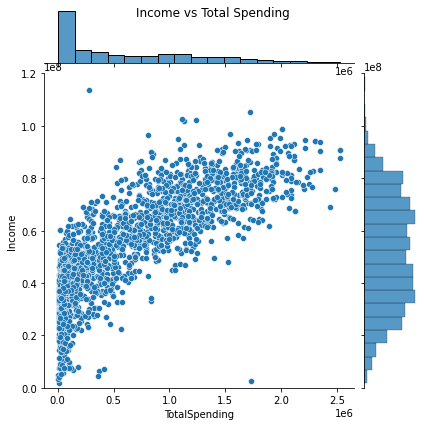

In [ ]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df["TotalSpending"], y=df["Income"])
plt.suptitle('Income vs Total Spending')
plot.ax_marg_y.set_ylim(0, 120000000)

###Income vs Age

(0.0, 120000000.0)

<Figure size 1080x576 with 0 Axes>

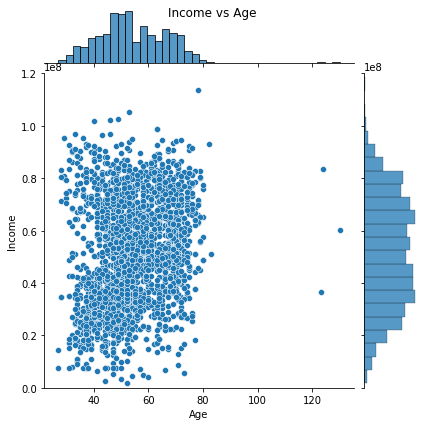

In [ ]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df["Age"], y=df["Income"])
plt.suptitle('Income vs Age')
plot.ax_marg_y.set_ylim(0, 120000000)

###Age vs Total Spending

(0.0, 80.0)

<Figure size 1080x576 with 0 Axes>

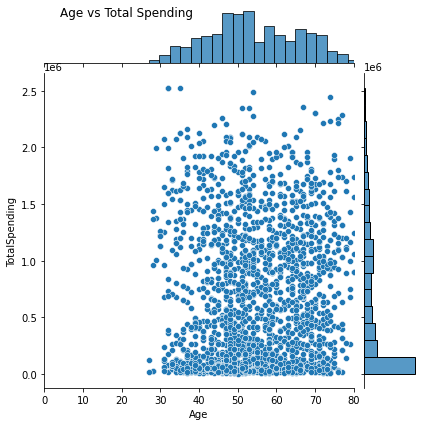

In [ ]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df["Age"], y=df["TotalSpending"])
plt.suptitle('Age vs Total Spending', x=0.3)
plot.ax_marg_x.set_xlim(0, 80)

###Age vs Conversion Rate

(0.0, 80.0)

<Figure size 1080x576 with 0 Axes>

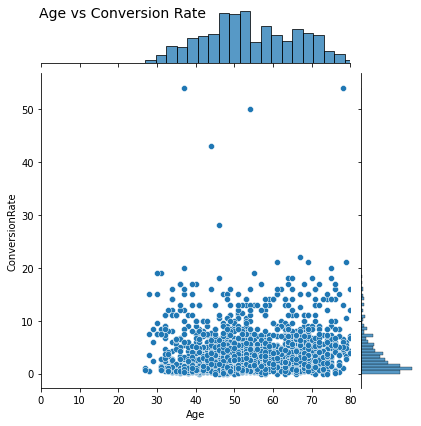

In [ ]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df["Age"], y=df["ConversionRate"])
plt.suptitle('Age vs Conversion Rate', x=0.3, fontsize=14)
plot.ax_marg_x.set_xlim(0, 80)

###Conversion Rate vs Total Spending

(0.0, 50.0)

<Figure size 1080x576 with 0 Axes>

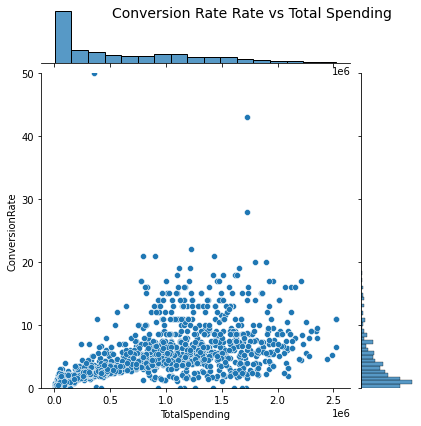

In [ ]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df["TotalSpending"], y=df["ConversionRate"])
plt.suptitle('Conversion Rate Rate vs Total Spending', x=0.6, fontsize=14)
plot.ax_marg_y.set_ylim(0, 50)

###Conversion Rate vs Income

(0.0, 120000000.0)

<Figure size 1080x576 with 0 Axes>

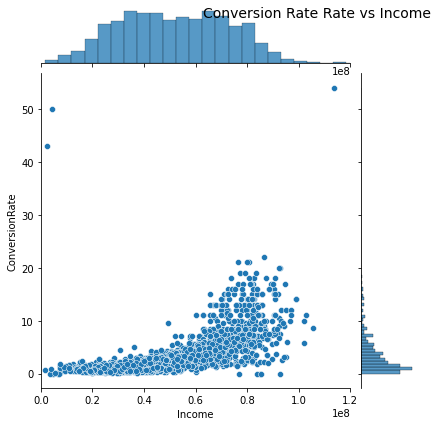

In [ ]:
plt.figure(figsize=(15, 8))
plot = sns.jointplot(x=df["Income"], y=df["ConversionRate"])
plt.suptitle('Conversion Rate Rate vs Income', x=0.75, fontsize=14)
plot.ax_marg_x.set_xlim(0, 120000000)

###Insight and Recommendation
**Insight**<br />
- The greater the income, the greater the convention rate that a customer has.<br />
- The greater the income, the greater the total spending customers spend on our platform.<br />
- The relationship between total spending and the convention rate is also linear. <br />
- The greater the total spending, the greater the convention rate.No specific age describes "certain ages have a higher convention rate.“<br />

**Recommendation**<br />
The greater the income, the greater the convention rate. We can target customers whose income is higher (60.000.000) and we will give them the more specific campaign


#Task 2 - Data Cleansing & Preprocessing

In [ ]:
df_clean = df.copy()

## Data Cleaning

### Missing Value

In [ ]:
#check missing value
counts = df_clean.isna().sum().sort_values(ascending=False)
#check % missing value
percentages = round(df_clean.isna().mean() * 100, 3).sort_values(ascending=False)
#concat
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
Income,24,1.071
Unnamed: 0,0,0.000
Response,0,0.000
AcceptedCmp4,0,0.000
AcceptedCmp5,0,0.000
AcceptedCmp1,0,0.000
AcceptedCmp2,0,0.000
Complain,0,0.000
Z_CostContact,0,0.000
Z_Revenue,0,0.000


In [ ]:
#delete missing value in Income 
df_clean = df_clean.dropna(subset=['Income'])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2216 non-null   int64         
 1   ID                   2216 non-null   int64         
 2   Year_Birth           2216 non-null   int64         
 3   Education            2216 non-null   object        
 4   Marital_Status       2216 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          2216 non-null   datetime64[ns]
 9   Recency              2216 non-null   int64         
 10  MntCoke              2216 non-null   int64         
 11  MntFruits            2216 non-null   int64         
 12  MntMeatProducts      2216 non-null   int64         
 13  MntFishProducts      2216 non-nul

### Duplicated Value

In [ ]:
#check duplicated
df_clean.duplicated().any()

False

There's no duplicated value

### Drop Columns which are not needed

In [ ]:
df_clean_new = df_clean.drop(columns=[
    'Unnamed: 0','ID','Year_Birth',
    'Dt_Customer','Kidhome','Teenhome',
    'Complain','Z_CostContact','Z_Revenue',
    'Response','Marital_Status'
    ])

In [ ]:
df_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntCoke              2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  AcceptedCmp3         2216 non-null   int64  
 15  AcceptedCmp4         2216 non-null   i

## Data Preprocessing

In [ ]:
df_pre = df_clean_new.copy()

### Feature Encoding

In [ ]:
cats_encode = ['Education', 'MaritalStatus', 'AgeGroup'] 

for col in cats_encode:
  print(f'value counts of column {col}')
  print(df_pre[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column MaritalStatus
InCouple    1430
Alone        786
Name: MaritalStatus, dtype: int64
------------------------------ 

value counts of column AgeGroup
Middle Adults    1154
Senior Adults     943
Young Adults      119
Name: AgeGroup, dtype: int64
------------------------------ 



Encoding strategy:<br />
- label encode: Education<br />
- One Hot Encoding: MaritalStatus, AgeGroup

In [ ]:
#Education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df_pre['Education'] = df_pre['Education'].map(mapping_education)

In [ ]:
#MaritalStatus & AgeGroup
cats_ohe = ['MaritalStatus','AgeGroup'] 

for cats in cats_ohe:
    onehots = pd.get_dummies(df_pre[cats], prefix=cats)
    df_pre = df_pre.join(onehots)

In [ ]:
#drop MaritalStatus & AgeGroup columns 
df_pre = df_pre.drop(columns=['MaritalStatus','AgeGroup']).copy()

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education               2216 non-null   int64  
 1   Income                  2216 non-null   float64
 2   Recency                 2216 non-null   int64  
 3   MntCoke                 2216 non-null   int64  
 4   MntFruits               2216 non-null   int64  
 5   MntMeatProducts         2216 non-null   int64  
 6   MntFishProducts         2216 non-null   int64  
 7   MntSweetProducts        2216 non-null   int64  
 8   MntGoldProds            2216 non-null   int64  
 9   NumDealsPurchases       2216 non-null   int64  
 10  NumWebPurchases         2216 non-null   int64  
 11  NumCatalogPurchases     2216 non-null   int64  
 12  NumStorePurchases       2216 non-null   int64  
 13  NumWebVisitsMonth       2216 non-null   int64  
 14  AcceptedCmp3            2216 non-null   

###Feature Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_scaled = df_pre.copy()

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Education               2216 non-null   int64  
 1   Income                  2216 non-null   float64
 2   Recency                 2216 non-null   int64  
 3   MntCoke                 2216 non-null   int64  
 4   MntFruits               2216 non-null   int64  
 5   MntMeatProducts         2216 non-null   int64  
 6   MntFishProducts         2216 non-null   int64  
 7   MntSweetProducts        2216 non-null   int64  
 8   MntGoldProds            2216 non-null   int64  
 9   NumDealsPurchases       2216 non-null   int64  
 10  NumWebPurchases         2216 non-null   int64  
 11  NumCatalogPurchases     2216 non-null   int64  
 12  NumStorePurchases       2216 non-null   int64  
 13  NumWebVisitsMonth       2216 non-null   int64  
 14  AcceptedCmp3            2216 non-null   

In [ ]:
nums = ['Income','Recency','MntCoke','MntFruits',
        'MntMeatProducts','MntFishProducts',
        'MntSweetProducts','MntGoldProds',
        'NumDealsPurchases',	'NumWebPurchases',
        'NumCatalogPurchases','NumStorePurchases',
        'NumWebVisitsMonth','TotalTransaction',	
        'ConversionRate',	'Age', 'TotalSpending', 
        'TotalAccCmpg', 'TotalKids']

for col in nums:
  df_scaled[col] = StandardScaler().fit_transform(df_scaled[[col]])

In [ ]:
df_scaled.sample(3)

,Education,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,IsParents,TotalSpending,TotalAccCmpg,TotalTransaction,ConversionRate,MaritalStatus_Alone,MaritalStatus_InCouple,AgeGroup_Middle Adults,AgeGroup_Senior Adults,AgeGroup_Young Adults
1582,2,1.200472,1.001574,-0.148529,0.518889,1.810637,0.262376,0.121061,-0.559135,-0.688176,...,0,0.608736,-0.439265,0.108083,2.595090,1,0,0,1,0
2131,3,0.797132,0.517845,1.941897,-0.662463,3.193130,0.225839,0.267179,-0.848689,-0.688176,...,0,2.196421,1.033369,0.496482,0.501669,1,0,1,0,0
418,2,1.542382,-0.553270,1.532708,2.202943,-0.263101,2.582446,2.678122,1.351925,-0.688176,...,0,1.438248,2.506003,1.402746,1.087827,1,0,1,0,0


# Task 3 - Data Modeling

##Elbow Method

In [ ]:
from sklearn.cluster import KMeans

**RFM Analysis for feature selection**<br />
- (Recency) Recency : The last time the customer made a transaction.<br />
- (Frequency) Conversion Rate : Frequency of transactions / visit made by the Customer.<br />
- (Monetary) Income : Customers revenue

In [ ]:
#new table
df_model = df_scaled[['Recency', 'Income', 'ConversionRate']].copy()

In [ ]:
df_model.sample(3)

,Recency,Income,ConversionRate
1249,0.206876,0.510929,-0.000752
183,-1.140655,-0.865018,-0.754384
1941,0.656053,-0.950724,-0.827654


<Axes: >

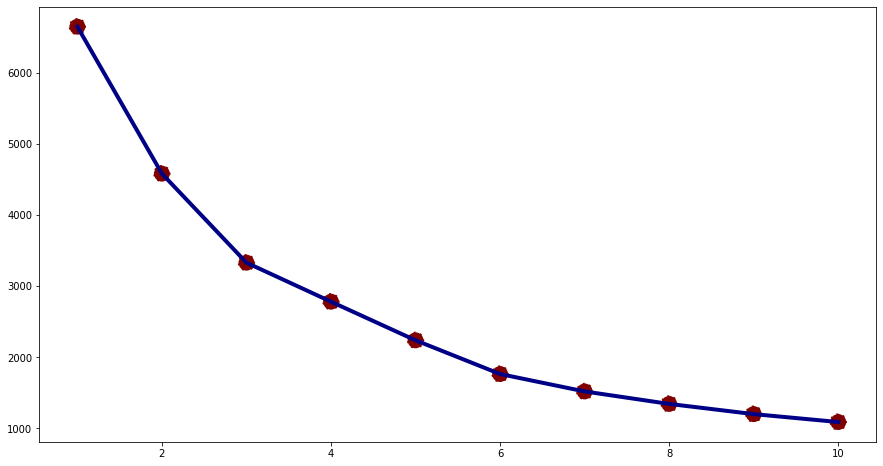

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_model.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(15, 8))

# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')



We choose to use 3 clusters for this model

##Clustering with K-Means

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df_model.values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
Clusters = kmeans.labels_
df_final = df_clean.copy()
df_final['Clusters'] = Clusters


In [ ]:
df_final.sample(6)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Age,AgeGroup,TotalKids,MaritalStatus,IsParents,TotalSpending,TotalAccCmpg,TotalTransaction,ConversionRate,Clusters
550,550,4279,1963,D3,Lajang,39548000.0,1,1,2014-03-31,87,...,60,Senior Adults,2,Alone,1,54000,0,5,1.666667,0
776,776,1072,1965,S3,Lajang,40760000.0,0,1,2013-08-30,64,...,58,Senior Adults,1,Alone,1,93000,0,7,1.166667,0
1699,1699,4676,1951,S2,Janda,73705000.0,0,2,2014-05-03,86,...,72,Senior Adults,2,Alone,1,1695000,0,26,5.200000,0
1750,1750,3571,1961,S3,Bertunangan,63342000.0,0,1,2012-10-16,48,...,62,Senior Adults,1,InCouple,1,1101000,1,22,3.666667,1
2194,2194,7118,1957,S1,Menikah,73803000.0,0,1,2012-01-08,61,...,66,Senior Adults,1,InCouple,1,1528000,1,25,4.166667,0
1155,1155,213,1963,S3,Lajang,23091000.0,1,1,2014-05-28,98,...,60,Senior Adults,2,Alone,1,48000,0,9,1.285714,0


In [ ]:
df_final.to_csv('data_marketing_campaign_final.csv', index=False)

##Sillhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_model)
    preds = kmeans.predict(df_model)
     
    score_euclidean = silhouette_score(df_model, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

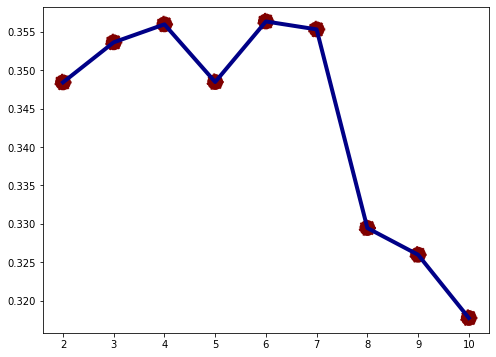

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

We can see that the number of clusters 4 and 6 has a slightly higher score than the number of clusters 3. Still, the number of clusters 3 will produce better clusters in providing insights for the business/marketing team to improve the company's business.


#Task 4

##PCA

In [ ]:
from sklearn.decomposition import PCA 

#PCA dengan component = 2
pca = PCA(n_components=2)

pca.fit(df_model)
pcs = pca.transform(df_model)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['Clusters'] = Clusters

In [ ]:
df_pca.sample(3)

,PC 1,PC 2,Clusters
1311,-1.392804,-1.656778,1
104,1.449836,1.621918,2
2136,-0.018702,1.005266,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

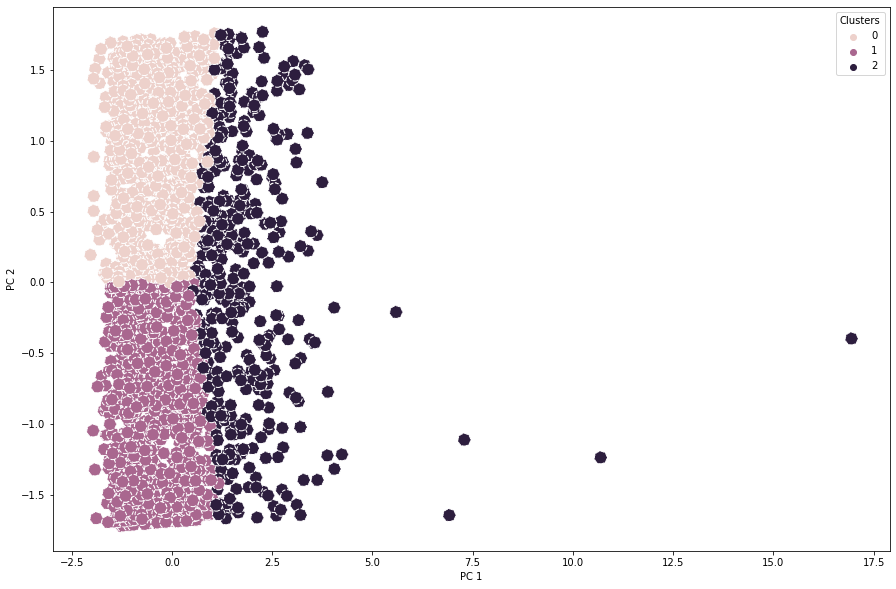

In [ ]:
# Plot the cluster in scatterlot
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Clusters",
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

**There is 1 data that is far from the other data**. This data will affect the clustering we will create if the number of clusters is changed to more than 3 clusters cause there will be a cluster with only one cluster member (the furthest point). This certainly will not be able to help the Business/Marketing Team provide insights to develop business strategies based on Clusters in the future.

In [ ]:
col = ['Income','Recency','ConversionRate','TotalSpending', 'NumDealsPurchases',	'NumWebVisitsMonth', 'Clusters']

df_final[col].groupby('Clusters').agg(['mean','count'])

Income          Recency       ConversionRate        \
                  mean count       mean count           mean count   
Clusters                                                             
0         4.518899e+07   873  74.712486   873       2.220297   873   
1         4.444994e+07   877  23.379704   877       2.076001   877   
2         8.014447e+07   466  49.107296   466       9.384115   466   

         TotalSpending       NumDealsPurchases       NumWebVisitsMonth        
                  mean count              mean count              mean count  
Clusters                                                                      
0         4.266277e+05   873          2.616266   873          6.090493   873  
1         4.000399e+05   877          2.532497   877          6.190422   877  
2         1.334760e+06   466          1.381974   466          2.233906   466

##Encoding Cluster

In [ ]:
map_cluster = {
    0 : 'Risk of Churn',
    1 : 'Low Spender',
    2 : 'High Spender'
}

df_final['cluster_mapped'] = df_final['Clusters'].map(map_cluster)

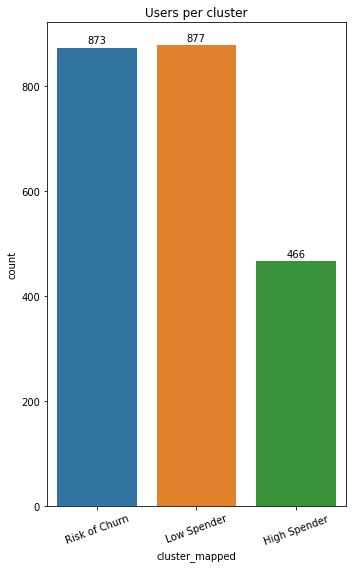

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
ax = sns.countplot(x=df_final['cluster_mapped'])
plt.title('Users per cluster')

plt.bar_label(ax.containers[0], padding=2)

plt.xticks(rotation=20)
plt.tight_layout()

## Age Group per Cluster

In [ ]:
df_final.groupby(['cluster_mapped','AgeGroup'])['Clusters'].count()

cluster_mapped  AgeGroup     
High Spender    Middle Adults    203
                Senior Adults    226
                Young Adults      37
Low Spender     Middle Adults    497
                Senior Adults    338
                Young Adults      42
Risk of Churn   Middle Adults    454
                Senior Adults    379
                Young Adults      40
Name: Clusters, dtype: int64

##Income per Cluster

(0.0, 200000000.0)

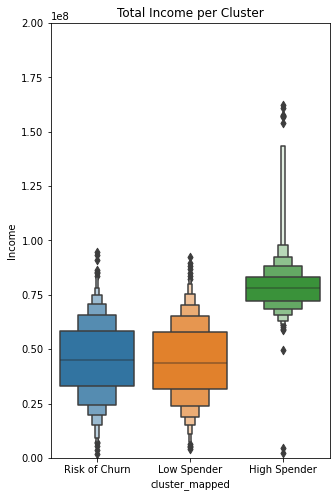

In [ ]:
plt.figure(figsize=(5,8))
sns.boxenplot(x=df_final['cluster_mapped'], y=df_final['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 200000000)

##Recency per Cluster

Text(0.5, 1.0, 'Recency per Cluster')

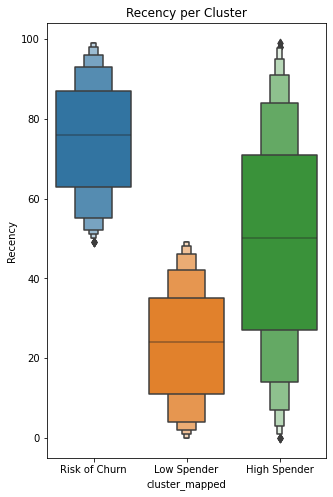

In [ ]:
plt.figure(figsize=(5,8))
sns.boxenplot(x=df_final['cluster_mapped'], y=df_final['Recency'])
plt.title('Recency per Cluster')

##Conversion Rate per Cluster

Text(0.5, 1.0, 'Conversion Rate per Cluster')

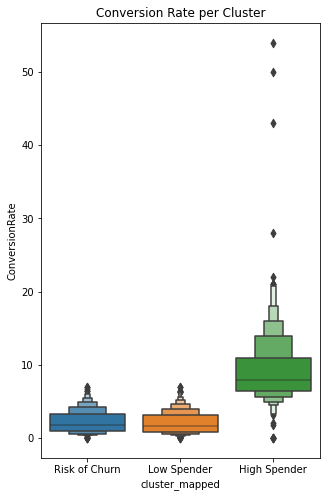

In [ ]:
plt.figure(figsize=(5,8))
sns.boxenplot(x=df_final['cluster_mapped'], y=df_final['ConversionRate'])
plt.title('Conversion Rate per Cluster')
     

##Total Spending per Cluster

Text(0.5, 1.0, 'Total Spending per Cluster')

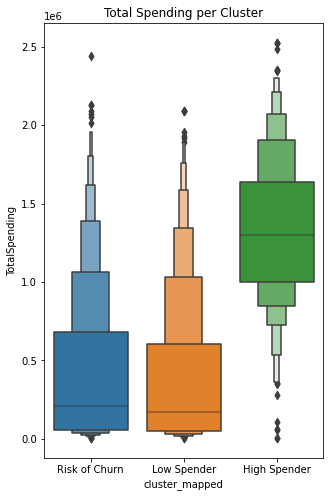

In [ ]:
plt.figure(figsize=(5,8))
sns.boxenplot(x=df_final['cluster_mapped'], y=df_final['TotalSpending'])
plt.title('Total Spending per Cluster')

##Nums Deals Purchases per Cluster

Text(0.5, 1.0, 'Number Web Visits Month per Cluster')

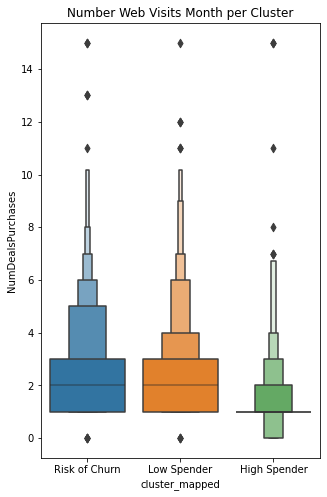

In [ ]:
plt.figure(figsize=(5,8))
sns.boxenplot(x=df_final['cluster_mapped'], y=df_final['NumDealsPurchases'])
plt.title('Number Web Visits Month per Cluster') 

##Nums Web Visit per Cluster

Text(0.5, 1.0, 'Number Deals Purchases per Cluster')

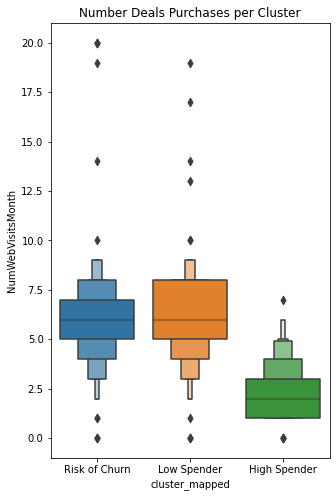

In [ ]:
plt.figure(figsize=(5,8))
sns.boxenplot(x=df_final['cluster_mapped'], y=df_final['NumWebVisitsMonth'])
plt.title('Number Deals Purchases per Cluster')

## Cluster Summary

**Cluster 2 (High Spender)**<br /> 
- Have 873 customers
- Senior Adults (>55 years old)is the domination(226 customers)
- Customers with the highest income (IDR 81 million in a year) and total spending (IDR 1.3 million per year)
- The second highest recency
- The highest conversion rate
- The lowest number of the website visit
- The lowest number of deals/promo purchase
- Is the **Customer Champions**

**Cluster 1 (Low Spender)**<br /> 
- Have 877 customers
- Middle Adults (36-55 years old) is the domination (497 customers)
- Customers with the lowest income (IDR 44 million per year) and total spending (IDR 400K per year)
- The lowest recency
- The lowest conversion rate
- The highest number of the website visit 
- The second highest number of deals/promo purchase
- Is the **Customer Need Attention**

**Cluster 0 (Risk of Churn)**<br /> 
- Have 466 customers
- Middle Adults (>55 years old)is the dommination (454 customers)
- Customers who are at the second highest income (IDR 45 million per year) and total spending (IDR 427K per year)
- The highest recency
- The second highest convension rate
- The second highest number of the website visit 
- The highest number of deals/promo purchase
- is the **Customer At Risk**




## Recommendation 

- Must maintain our **High Spender Customers**. We can make special promo for customers in this cluster so they don't churn
- The **Low Spender** and **Risk of Churn** clusters are the group that often visit our website but rarely buy. This case happened maybe cause their promo is not suitable for them. We need to do more analysist to know why this case happened